In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")


In [9]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.shape

(891, 12)

In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

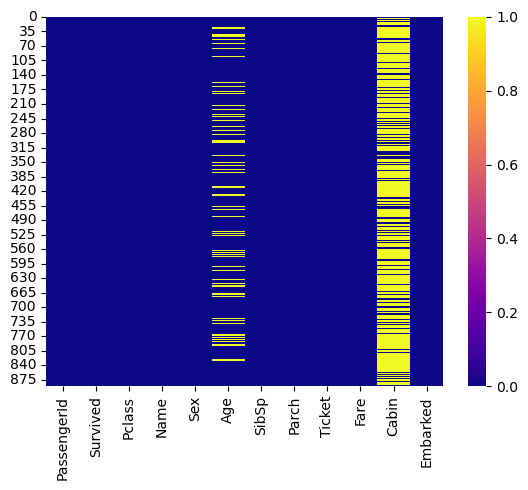

In [13]:
import seaborn as sns
sns.heatmap(titanic_df.isnull(),cmap='plasma')

In [14]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [17]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [19]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.261236
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.521561
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [20]:
x=titanic_df.drop(['Survived','PassengerId','Name','Ticket'],axis=1)
y= titanic_df['Survived']

In [21]:
print(x)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
885       3    1  39.0      0      5  29.1250         2
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[712 rows x 7 columns]


In [22]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

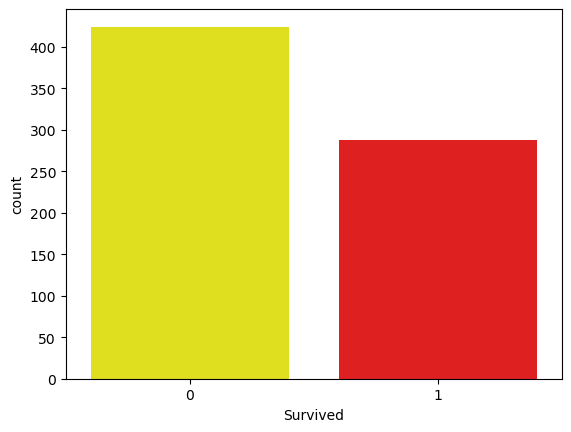

In [23]:
custom_palette = ['yellow', 'red']
sns.countplot(x='Survived', data=titanic_df, palette=custom_palette)

<Axes: xlabel='Sex', ylabel='count'>

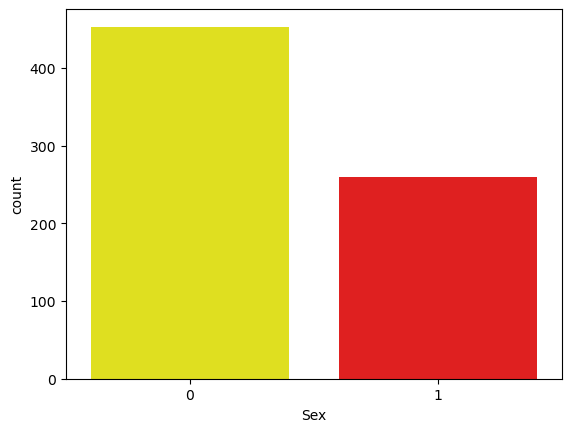

In [24]:
custom_palette = ['yellow', 'red']
sns.countplot(x='Sex', data=titanic_df, palette=custom_palette)

<Axes: xlabel='Sex', ylabel='count'>

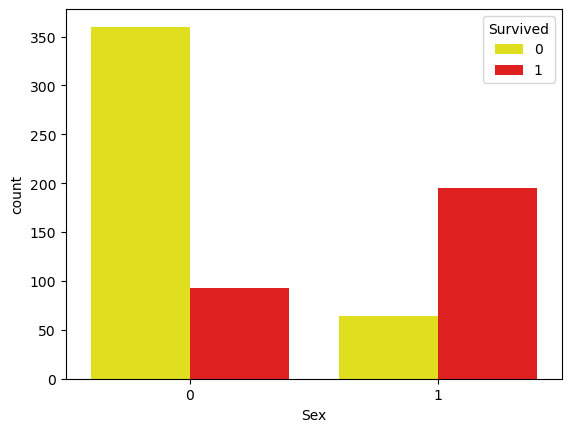

In [25]:
custom_palette = ['yellow', 'red']
sns.countplot(x='Sex',hue='Survived', data=titanic_df, palette=custom_palette)

In [26]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=2)

In [27]:
x_train.shape

(356, 7)

In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8117977528089888


C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print(y_pred.ravel())


[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]


In [30]:
X_train_prediction = lg.predict(x_train)
print("Predictions on training data:")
print(X_train_prediction)

Predictions on training data:
[1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1]


train_data_accuracy = accuracy_score(x_train, X_train_prediction)
print("Accuracy Score on training data:", train_data_accuracy)

In [31]:
train_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy Score on training data:", train_data_accuracy)

Accuracy Score on training data: 0.7865168539325843


In [32]:
X_test_prediction = lg.predict(x_test)
print("Predictions on testing data:")
print(X_test_prediction)


Predictions on testing data:
[1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]


In [33]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Accuracy score on testing data:", test_data_accuracy)

Accuracy score on testing data: 0.8117977528089888


In [34]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [36]:
input_df=(3,0,22.0,1,0,7.2500,0.0)
input_df_np= np.asarray(input_df)
prediction = lg.predict(input_df_np.reshape(1, -1))
if prediction[0]==0:
    print('This person Survived')
else:
    print('This person Dead')

This person Survived


C:\Users\Tejas\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
